In [1]:
!pip install yahoo-finance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start ="2012-01-01"
end = "2024-02-14"
stock = "GOOG"

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3043,2024-02-07,146.119995,147.000000,145.210007,146.679993,146.679993,21436100
3044,2024-02-08,146.970001,147.610001,146.419998,147.220001,147.220001,18241300
3045,2024-02-09,147.949997,150.695007,147.429993,150.220001,150.220001,21877700
3046,2024-02-12,149.539993,150.589996,148.559998,148.729996,148.729996,17236100


In [6]:
ma_100_days = data.Close.rolling(100).mean()

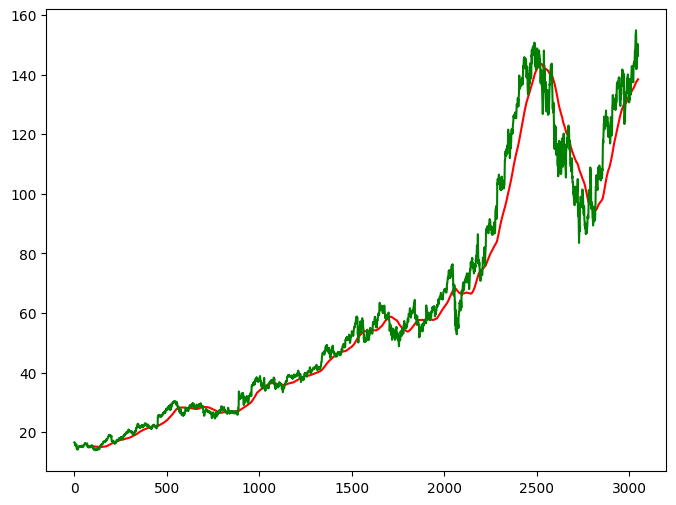

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()


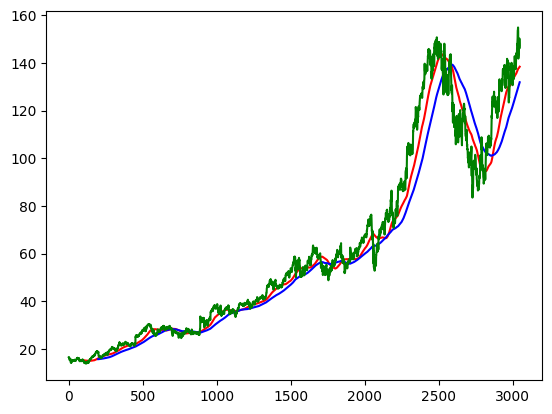

In [8]:
ma_200_days = data.Close.rolling(200).mean()
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()


In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test =pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape[0]

2438

In [12]:
data_test.shape[0]

610

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
!pip install keras 

In [17]:
!pip install tensorflow

In [18]:
x,y= np.array(x),np.array(y)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu' ,return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\HP'\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [22]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - loss: 0.0363
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - loss: 0.0041
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - loss: 0.0041
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - loss: 0.0045
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0031
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - loss: 0.0026
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0026
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 0.0023
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 0.0018
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - loss: 0.0024
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0023
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - loss: 0.0021
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - loss: 0.0025
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - loss: 0.0020
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [23]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_days = data_train.tail(100) 

In [25]:
data_test = pd.concat([pas_100_days, data_test],ignore_index=True)

In [26]:
data_test_scale = scaler.fit_transform(data_test)

In [27]:
x = []
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


In [29]:
scale = 1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

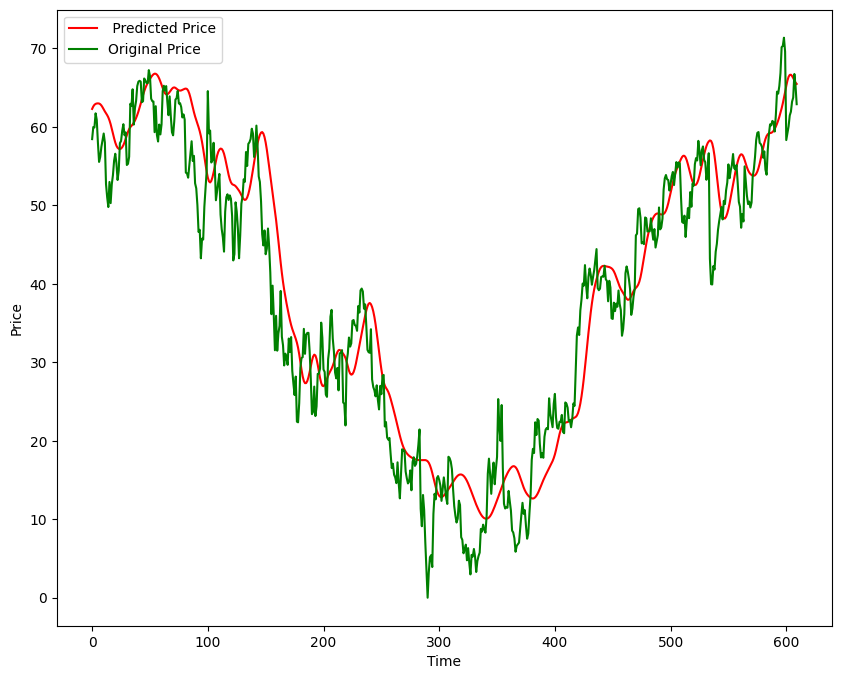

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' , label= ' Predicted Price')
plt.plot(y, 'g' , label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')